# Outlier detection and removal using z-score and standard deviation in python pandas

In [3]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

In [4]:
df = pd.read_csv("HR_Employee_Attrition_Dataset.csv")
df.sample(5)

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1435,1436,No,44,Travel_Rarely,1037,Research & Development,1,3,Medical,2,...,3,80,0,6,2,3,4,3,1,2
203,204,No,40,Travel_Rarely,905,Research & Development,19,2,Medical,3,...,3,80,1,15,2,4,7,2,3,7
128,129,No,22,Travel_Rarely,594,Research & Development,2,1,Technical Degree,3,...,3,80,1,3,2,3,2,1,2,1
1433,1434,No,25,Travel_Rarely,1382,Sales,8,2,Other,1,...,2,80,1,6,3,2,5,3,0,4
1241,1242,No,32,Travel_Rarely,371,Sales,19,3,Life Sciences,4,...,3,80,1,10,2,1,4,3,0,2


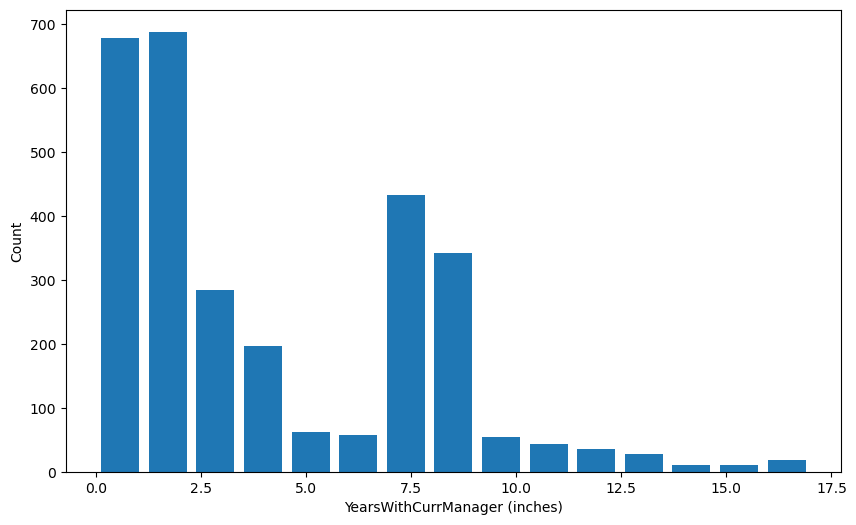

In [5]:
plt.hist(df.YearsWithCurrManager, bins=15, rwidth=0.8)
plt.xlabel('YearsWithCurrManager (inches)')
plt.ylabel('Count')
plt.show()

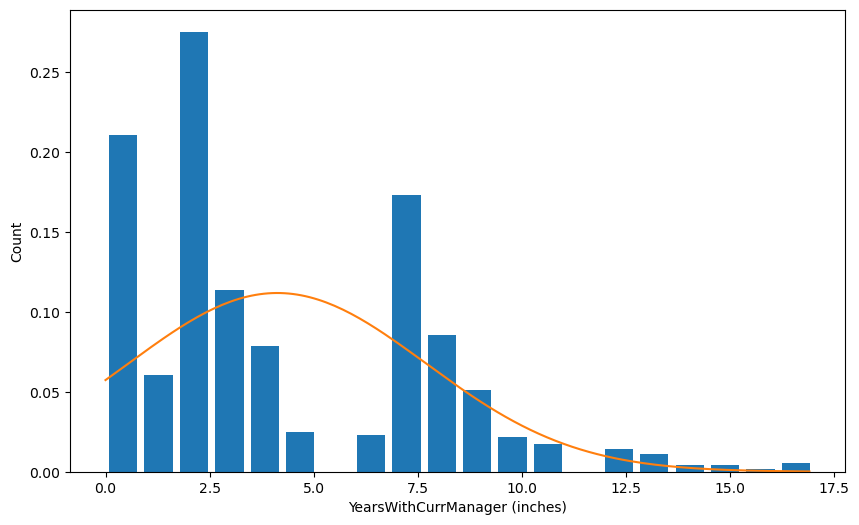

In [7]:
from scipy.stats import norm
import numpy as np
plt.hist(df.YearsWithCurrManager, bins=20, rwidth=0.8, density=True)
plt.xlabel('YearsWithCurrManager (inches)')
plt.ylabel('Count')

rng = np.arange(df.YearsWithCurrManager.min(), df.YearsWithCurrManager.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.YearsWithCurrManager.mean(),df.YearsWithCurrManager.std()))

In [8]:
df.YearsWithCurrManager.mean()

4.12312925170068

In [9]:
df.YearsWithCurrManager.std()

3.567529036551258

# Outlier detection and removal using 3 standard deviation

In [10]:
upper_limit = df.YearsWithCurrManager.mean() + 3*df.YearsWithCurrManager.std()
upper_limit

14.825716361354454

In [11]:
lower_limit = df.YearsWithCurrManager.mean() -3*df.YearsWithCurrManager.std()
lower_limit

-6.579457857953093

In [13]:
df[(df.YearsWithCurrManager>upper_limit) | (df.YearsWithCurrManager<lower_limit)]

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
28,29,No,44,Travel_Rarely,477,Research & Development,7,4,Medical,1,...,4,80,1,24,4,3,22,6,5,17
123,124,No,51,Travel_Rarely,684,Research & Development,6,3,Life Sciences,1,...,3,80,0,23,5,3,20,18,15,15
153,154,No,45,Travel_Rarely,194,Research & Development,9,3,Life Sciences,2,...,3,80,1,20,2,1,17,9,0,15
187,188,No,55,Travel_Rarely,692,Research & Development,14,4,Medical,3,...,4,80,0,36,3,3,24,15,2,15
231,232,No,42,Travel_Rarely,532,Research & Development,4,2,Technical Degree,3,...,4,80,0,22,3,3,22,17,11,15
386,387,No,37,Travel_Rarely,1107,Research & Development,14,3,Life Sciences,4,...,3,80,1,18,2,2,18,7,12,17
561,562,No,52,Travel_Rarely,621,Sales,3,4,Marketing,3,...,1,80,0,34,3,4,34,6,1,16
616,617,No,51,Travel_Rarely,1318,Sales,26,4,Marketing,1,...,3,80,1,29,2,2,20,6,4,17
635,636,No,35,Travel_Rarely,607,Research & Development,9,3,Life Sciences,4,...,2,80,1,17,2,3,17,14,5,15
686,687,No,41,Travel_Rarely,263,Research & Development,6,3,Medical,4,...,3,80,0,20,3,3,18,13,2,17


**Now remove these outliers and generate new dataframe**

In [14]:
df_no_outlier_std_dev = df[(df.YearsWithCurrManager<upper_limit) & (df.YearsWithCurrManager>lower_limit)]
df_no_outlier_std_dev.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [15]:
df_no_outlier_std_dev.shape

(2912, 34)

In [16]:
df.shape

(2940, 34)

# Outlier detection and removal using Z Score

**Calculate the Z Score**

In [24]:
df['zscore'] = ( df.YearsWithCurrManager - df.YearsWithCurrManager.mean() ) / df.YearsWithCurrManager.std()
df.head(5)

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,80,0,8,0,1,6,4,0,5,0.245792
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,80,1,10,3,3,10,7,1,7,0.806404
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,80,0,7,3,3,0,0,0,0,-1.155738
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,...,80,0,8,3,3,8,7,3,0,-1.155738
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,80,1,6,3,3,2,2,2,2,-0.595126


In [25]:
(5-4.1)/3.5

0.25714285714285723

In [29]:
df[df['zscore']>3]

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore
28,29,No,44,Travel_Rarely,477,Research & Development,7,4,Medical,1,...,80,1,24,4,3,22,6,5,17,3.609465
123,124,No,51,Travel_Rarely,684,Research & Development,6,3,Life Sciences,1,...,80,0,23,5,3,20,18,15,15,3.048853
153,154,No,45,Travel_Rarely,194,Research & Development,9,3,Life Sciences,2,...,80,1,20,2,1,17,9,0,15,3.048853
187,188,No,55,Travel_Rarely,692,Research & Development,14,4,Medical,3,...,80,0,36,3,3,24,15,2,15,3.048853
231,232,No,42,Travel_Rarely,532,Research & Development,4,2,Technical Degree,3,...,80,0,22,3,3,22,17,11,15,3.048853
386,387,No,37,Travel_Rarely,1107,Research & Development,14,3,Life Sciences,4,...,80,1,18,2,2,18,7,12,17,3.609465
561,562,No,52,Travel_Rarely,621,Sales,3,4,Marketing,3,...,80,0,34,3,4,34,6,1,16,3.329159
616,617,No,51,Travel_Rarely,1318,Sales,26,4,Marketing,1,...,80,1,29,2,2,20,6,4,17,3.609465
635,636,No,35,Travel_Rarely,607,Research & Development,9,3,Life Sciences,4,...,80,1,17,2,3,17,14,5,15,3.048853
686,687,No,41,Travel_Rarely,263,Research & Development,6,3,Medical,4,...,80,0,20,3,3,18,13,2,17,3.609465


In [31]:
df[df['zscore']<-3]

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore


In [32]:
df[(df.zscore<-3) | (df.zscore>3)]

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore
28,29,No,44,Travel_Rarely,477,Research & Development,7,4,Medical,1,...,80,1,24,4,3,22,6,5,17,3.609465
123,124,No,51,Travel_Rarely,684,Research & Development,6,3,Life Sciences,1,...,80,0,23,5,3,20,18,15,15,3.048853
153,154,No,45,Travel_Rarely,194,Research & Development,9,3,Life Sciences,2,...,80,1,20,2,1,17,9,0,15,3.048853
187,188,No,55,Travel_Rarely,692,Research & Development,14,4,Medical,3,...,80,0,36,3,3,24,15,2,15,3.048853
231,232,No,42,Travel_Rarely,532,Research & Development,4,2,Technical Degree,3,...,80,0,22,3,3,22,17,11,15,3.048853
386,387,No,37,Travel_Rarely,1107,Research & Development,14,3,Life Sciences,4,...,80,1,18,2,2,18,7,12,17,3.609465
561,562,No,52,Travel_Rarely,621,Sales,3,4,Marketing,3,...,80,0,34,3,4,34,6,1,16,3.329159
616,617,No,51,Travel_Rarely,1318,Sales,26,4,Marketing,1,...,80,1,29,2,2,20,6,4,17,3.609465
635,636,No,35,Travel_Rarely,607,Research & Development,9,3,Life Sciences,4,...,80,1,17,2,3,17,14,5,15,3.048853
686,687,No,41,Travel_Rarely,263,Research & Development,6,3,Medical,4,...,80,0,20,3,3,18,13,2,17,3.609465


<h3 style='color:purple'>Remove the outliers and produce new dataframe</h3>

In [34]:
df_no_outliers = df[(df.zscore>-3) & (df.zscore<3)]
df_no_outliers.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,80,0,8,0,1,6,4,0,5,0.245792
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,80,1,10,3,3,10,7,1,7,0.806404
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,80,0,7,3,3,0,0,0,0,-1.155738
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,...,80,0,8,3,3,8,7,3,0,-1.155738
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,80,1,6,3,3,2,2,2,2,-0.595126


In [35]:
df_no_outliers.shape

(2912, 35)

In [36]:
df.shape

(2940, 35)